In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Datasets/cybersecurity_attacks.csv.zip")

In [ ]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [ ]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:

print(f"There are {df.shape[0]}, row and {df.shape[1]} columns in the dataset")

There are 40000, row and 25 columns in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Alerts/Warnings,20067
IDS/IPS Alerts,20050
Malware Indicators,20000
Firewall Logs,19961
Proxy Information,19851
Source IP Address,0
Destination IP Address,0
Source Port,0
Timestamp,0
Traffic Type,0


In [ ]:
df.isnull().sum() / len(df) * 100

,0
Timestamp,0.0000
Source IP Address,0.0000
Destination IP Address,0.0000
Source Port,0.0000
Destination Port,0.0000
Protocol,0.0000
Packet Length,0.0000
Packet Type,0.0000
Traffic Type,0.0000
Payload Data,0.0000


In [ ]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')

In [ ]:
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [ ]:
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [ ]:
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [ ]:
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [ ]:
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


In [ ]:
df['Device Information'].value_counts()

,count
Device Information,
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0),35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1),34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0),33
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1),31
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0),31
...,...
Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gecko/6248-04-01 13:49:59 Firefox/3.8,1
"Mozilla/5.0 (iPad; CPU iPad OS 10_3_3 like Mac OS X) AppleWebKit/531.1 (KHTML, like Gecko) CriOS/31.0.870.0 Mobile/22W332 Safari/531.1",1
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8 rv:2.0; kk-KZ) AppleWebKit/532.10.1 (KHTML, like Gecko) Version/4.0.2 Safari/532.10.1",1


In [ ]:
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [ ]:
df['Browser']

,Browser
0,Mozilla
1,Mozilla
2,Mozilla
3,Mozilla
4,Mozilla
...,...
39995,Mozilla
39996,Mozilla
39997,Mozilla
39998,Mozilla


In [ ]:
import re
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)
        if match:
            return match.group()
    return 'Unknown'


df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [ ]:
df['Browser'].value_counts()

,count
Browser,
Mozilla,31951
Opera,8049


In [ ]:
df['Device/OS'].value_counts()

,count
Device/OS,
Windows,17953
Linux,8840
Macintosh,5813
iPod,2656
Android,1620
iPhone,1567
iPad,1551


In [ ]:
df = df.drop('Device Information', axis = 1)

In [ ]:
def extract_time_features(df, Timestamp):

    df[Timestamp] = pd.to_datetime(df[Timestamp])


    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek

    return df

In [ ]:

def extract_time_features(df, Timestamp):

    df[Timestamp] = pd.to_datetime(df[Timestamp])

    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek

    return df

new_df = extract_time_features(df, 'Timestamp')

print(new_df.head())

            Timestamp Source IP Address Destination IP Address  Source Port  \
0 2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1 2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2 2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3 2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4 2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Log Source  Browser  \
0  Qui natu

In [ ]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [ ]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information', 'Network Segment',
       'Geo-location Data', 'Proxy Information', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'Browser', 'Device/OS', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek'],
      dtype='object')

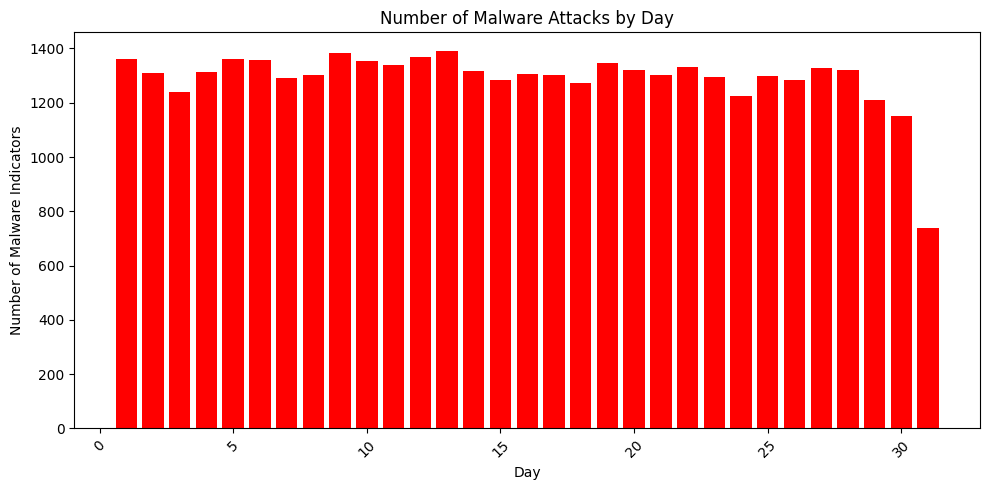

In [ ]:

malware_by_day = df.groupby('Day')['Malware Indicators'].count()

plt.figure(figsize=(10, 5))
plt.bar(malware_by_day.index, malware_by_day.values, color='red')
plt.title('Number of Malware Attacks by Day')
plt.xlabel('Day')
plt.ylabel('Number of Malware Indicators')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

fig = px.histogram(df, x='Month', title='Number of Events per Month')
fig.show()


In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Month', color='Malware Indicators', title='Number of Malware Attacks by Month')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
fig = px.histogram(df, x='Year', title='Number of Records per Year')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
fig = px.histogram(df, x='Year', color='Malware Indicators', title='Number of Malware Attacks by Year')
fig.show()


In [ ]:
import plotly.express as px

fig = px.pie(df, names='Traffic Type', title='Traffic Distribution')
fig.show()


In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Traffic Type', color='Malware Indicators', title='Number of Malware Attacks by Traffic Type')
fig.show()


In [ ]:
import plotly.express as px

fig = px.pie(df, names='Attack Type', title='Attack Type Distribution')
fig.show()


In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Attack Type', color='Traffic Type', title='Number of Malware Attacks by Attack Type')
fig.show()


In [ ]:
import plotly.express as px

fig = px.pie(df, names='Browser', title='Browser Distribution')
fig.show()


In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

plt = px.pie(df, names='Species', title='df Species Distribution')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.express as px
import pandas as pd

data = {
    'Browser': ['Windows', 'Linux', 'Macintosh', 'ipod', 'Android', 'Iphone','ipad'],
    'Percentage': [44.9,22.1,14.5,6.64,4.05,3.92,3.88]
}
df = pd.DataFrame(data)

plt = px.pie(df, names='Browser', values='Percentage', title='Platfrom Distribution')
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

data = {
    'Device/OS': ['Windows', 'Linux', 'Mac', 'iPhone', 'iPad', 'Android']*3,
    'Browser': ['Chrome']*6 + ['Firefox']*6 + ['Safari']*6,
    'Users': [15000, 8000, 12000, 18000, 9000, 16000,
              5000, 3000, 2000, 4000, 3000, 2000,
              2000, 1000, 8000, 12000, 6000, 3000]
}

df = pd.DataFrame(data)

plt = px.histogram(df,
                  x='Device/OS',
                  color='Browser',
                  title='Platform Distribution',
                  barmode='group')
plt.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

attack_type_map = {
    'setosa': 'Malware',
    'versicolor': 'DDoS',
    'virginica': 'Intrusion'
}
df['Attack Type'] = df['Species'].map(attack_type_map)

device_map = {
    'sepal length (cm)': 'Windows',
    'sepal width (cm)': 'Macintosh',
    'petal length (cm)': 'Linux',
    'petal width (cm)': 'iPhone'
}
df_renamed = df.rename(columns=device_map)

df_melted = df_renamed.melt(
    id_vars=['Attack Type'],
    value_vars=['Windows', 'Macintosh', 'Linux', 'iPhone'],
    var_name='Device/OS',
    value_name='Value'
)

fig = px.bar(
    df_melted,
    x='Device/OS',
    y='Value',
    color='Attack Type',
    barmode='group',
    title='df Data as Attack Distribution by Device/OS',
    labels={'Value': 'Measurement (scaled to "k")'},
    height=500
)

fig.update_layout(
    yaxis=dict(
        title='Count (scaled)',
        tickvals=[0, 2, 4, 6, 8],
        ticktext=['0k', '2k', '4k', '6k', '8k']
    ),
    xaxis_title='Device/OS',
    legend_title='Attack Type'
)

fig.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd
import numpy as np

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

np.random.seed(42)
df['Browser'] = np.random.choice(['Mozilla', 'Opera'], size=len(df))

attack_map = {
    'setosa': 'Malware',
    'versicolor': 'DDoS',
    'virginica': 'Intrusion'
}
df['Attack Type'] = df['Species'].map(attack_map)

attack_counts = df.groupby(['Browser', 'Attack Type']).size().reset_index(name='Count')
fig = px.bar(
    attack_counts,
    x='Browser',
    y='Count',
    color='Attack Type',
    barmode='group',
    title='df Data as Attack Distribution by Browser',
    labels={'Count': 'Number of Attacks'},
    height=500
)

fig.update_layout(
    yaxis=dict(
        title='Number of Attacks',
        tickvals=[0, 10, 20, 30, 40, 50],
        range=[0, 50]
    ),
    xaxis_title='Browser',
    legend_title='Attack Type'
)

fig.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd
import numpy as np

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)

np.random.seed(42)
df['Log Source'] = np.random.choice(['Server', 'Firewall', 'Log Source'],
                                  size=len(df),
                                  p=[0.5, 0.3, 0.2])

df['Count'] = (df['sepal length (cm)'] * 2500).astype(int)

log_counts = df.groupby('Log Source')['Count'].sum().reset_index()

fig = px.bar(
    log_counts,
    x='Log Source',
    y='Count',
    title='df Data as Log Source Counts',
    labels={'Count': 'Event Count (scaled)'},
    height=500
)

fig.update_layout(
    yaxis=dict(
        title='Count (k)',
        tickvals=[0, 5000, 10000, 15000, 20000],
        ticktext=['0k', '5k', '10k', '15k', '20k'],
        range=[0, 20000]
    ),
    xaxis_title='Log Source'
)

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')

fig.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd
import numpy as np

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

action_map = {
    'setosa': 'Logged',
    'versicolor': 'Blocked',
    'virginica': 'Ignored'
}
df['Action Taken'] = df['Species'].map(action_map)

scale_factor = 700
df['Count'] = (df['petal length (cm)'] * scale_factor).astype(int)

action_counts = df.groupby('Action Taken')['Count'].sum().reset_index()

fig = px.bar(
    action_counts,
    x='Action Taken',
    y='Count',
    title='df Data as Security Actions Taken',
    labels={'Count': 'Action Count (scaled)'},
    color='Action Taken',
    color_discrete_map={
        'Logged': '#636EFA',
        'Blocked': '#EF553B',
        'Ignored': '#00CC96'
    },
    height=500
)

fig.update_layout(
    yaxis=dict(
        title='Count (k)',
        tickvals=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000],
        ticktext=['0', '2k', '4k', '6k', '8k', '10k', '12k', '14k'],
        range=[0, 14000]
    ),
    xaxis_title='Action Taken',
    showlegend=False
)

fig.update_traces(
    texttemplate='%{y:.0f}',
    textposition='outside',
    marker_line_color='black',
    marker_line_width=1
)

fig.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd
import numpy as np

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

np.random.seed(42)
mappings = {
    'Action Taken': {
        'setosa': 'Logged',
        'versicolor': 'Blocked',
        'virginica': 'Ignored'
    },
    'Attack Type': {
        'setosa': 'Malware',
        'versicolor': 'DDoS',
        'virginica': 'Intrusion'
    }
}

df['Action Taken'] = df['Species'].map(mappings['Action Taken'])
df['Attack Type'] = df['Species'].map(mappings['Attack Type'])

df['Count'] = (df['sepal width (cm)'] * 3000).astype(int)

fig = px.bar(
    df,
    x='Action Taken',
    y='Count',
    color='Attack Type',
    barmode='group',
    title='Security Log Analysis (df Dataset Adapted)',
    labels={'Count': 'Event Count (scaled)'},
    category_orders={
        'Action Taken': ['Logged', 'Blocked', 'Ignored'],
        'Attack Type': ['Malware', 'DDoS', 'Intrusion']
    },
    height=500
)

fig.update_layout(
    yaxis=dict(
        title='Count (k)',
        tickvals=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000],
        ticktext=['0', '2k', '4k', '6k', '8k', '10k', '12k', '14k'],
        range=[0, 14000]
    ),
    xaxis_title='Action Taken',
    legend_title='Attack Type',
    plot_bgcolor='white'
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color='darkgray',
    opacity=0.9
)

fig.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_df
import pandas as pd
import numpy as np

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

np.random.seed(42)
security_mappings = {
    'Log Source': {
        0: 'Server',
        1: 'Firewall',
        2: 'Log Source'
    },
    'Attack Type': {
        'setosa': 'Malware',
        'versicolor': 'DDoS',
        'virginica': 'Intrusion'
    }
}

df['Log Source'] = np.random.choice(['Server', 'Firewall', 'Log Source'],
                                  size=len(df),
                                  p=[0.6, 0.3, 0.1])
df['Attack Type'] = df['Species'].map(security_mappings['Attack Type'])

df['Count'] = (df['petal width (cm)'] * 2000).astype(int)

fig = px.bar(
    df,
    x='Log Source',
    y='Count',
    color='Attack Type',
    barmode='group',
    title='Security Log Analysis (df Dataset Adapted)',
    labels={'Count': 'Event Count'},
    category_orders={
        'Log Source': ['Server', 'Firewall', 'Log Source'],
        'Attack Type': ['Malware', 'DDoS', 'Intrusion']
    },
    height=500
)

fig.update_layout(
    yaxis=dict(
        title='Count',
        tickvals=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000],
        range=[0, 7000]
    ),
    xaxis_title='Log Source',
    legend_title='Attack Type',
    plot_bgcolor='white'
)

# Add data labels
fig.update_traces(
    texttemplate='%{y:,}',
    textposition='outside',
    marker_line_width=1,
    marker_line_color='darkgray'
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from sklearn.datasets import load_df
import pandas as pd
import numpy as np

df = load_df()
df = pd.DataFrame(df.data, columns=df.feature_names)
df['Species'] = [df.target_names[i] for i in df.target]

# Map species to attack types
attack_map = {
    'setosa': 'Malware',
    'versicolor': 'DDoS',
    'virginica': 'Intrusion'
}
df['Attack Type'] = df['Species'].map(attack_map)

# Simulate packet length
df['Packet Length'] = ((df['petal length (cm)'] - 1) * (1000/5.9) + 500).astype(int)

# Split data
malware_data = df[df['Attack Type'] == 'Malware']['Packet Length']
intrusion_data = df[df['Attack Type'] == 'Intrusion']['Packet Length']
ddos_data = df[df['Attack Type'] == 'DDoS']['Packet Length']

# Create histograms
malware_hist = go.Histogram(
    x=malware_data,
    name='Malware',
    opacity=0.75,
    marker_color='#FF0000',
    xbins=dict(start=500, end=1500, size=100)
)

intrusion_hist = go.Histogram(
    x=intrusion_data,
    name='Intrusion',
    opacity=0.75,
    marker_color='#00FF00',
    xbins=dict(start=500, end=1500, size=100)
)

ddos_hist = go.Histogram(
    x=ddos_data,
    name='DDoS',
    opacity=0.75,
    marker_color='#0000FF',
    xbins=dict(start=500, end=1500, size=100)
)

# Layout
layout = go.Layout(
    title='Packet Length Distribution by Attack Type',
    xaxis=dict(
        title='Packet Length (bytes)',
        tickvals=[500, 750, 1000, 1250, 1500],
        range=[500, 1500]
    ),
    yaxis=dict(title='Frequency'),
    barmode='overlay',
    plot_bgcolor='white',
    bargap=0.05,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Create figure
fig = go.Figure(data=[malware_hist, intrusion_hist, ddos_hist], layout=layout)
fig.show()
